<h1>Does Location Relative to the Equator Correlate Weather Patterns?</h1>

<h2>Dependencies and Range of Latitude and Longitude</h2>

In [81]:
# Dependencies and Setup
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime as dt

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [82]:
todays_date = str(dt.now()).split(" ")[0]

<h2>Acquire Cities</h2>

In [83]:
lat_lngs = []
cities = []
city_count = 0

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_count += 1

# Print the city count to confirm sufficient count
len(cities)

627

<h2>Pull Weather Data By City</h2>

In [102]:
#Function to iterate through cities and return dictionaries of weather data per city
city_weathers = []

#batch variables
batch_set = 50
set_num = 0

def get_weather(indices):
    
    print("Beginning Data Retrieval")
    print("--------------------------------------")
    
    #for loop to go through the list of cities
    for city in range(len(indices)):
        
        #querey url
        base_url = 'http://api.openweathermap.org/data/2.5/weather?q='
        query_url = base_url + str(indices[city]) + '&units=imperial' +'&appid=' + api_key
        
        # Get one of the posts
        city_response = requests.get(query_url).json()
        
        #error handling
        try:
            
            print(f"Processing Record {city + 1} of Set {set_num + 1} | {indices[city]}")
        
            #assign variables 
            city_country = city_response['sys']['country']
            city_date = city_response['dt']
            city_clouds = city_response['clouds']['all']
            city_humidity = city_response['main']['humidity']
            city_lat = city_response['coord']['lat']
            city_lng = city_response['coord']['lon']
            city_temp = city_response['main']['temp_max']
            city_wind = city_response['wind']['speed']
        
            city_weather = {
                "city": indices[city],
                "country": city_country,
                "date": city_date,
                "cloudiness": city_clouds,
                "humidity": city_humidity,
                "latitude": city_lat,
                "longitude": city_lng,
                "max temperature": city_temp,
                "wind speed": city_wind
                }
        
        
        except (KeyError, IndexError):
            
            print("Missing field/result... skipping.")
            
            city_weather = {
                "city": np.nan,
                "country": np.nan,
                "date": np.nan,
                "cloudiness": np.nan,
                "humidity": np.nan,
                "latitude": np.nan,
                "longitude": np.nan,
                "max temperature": np.nan,
                "wind speed": np.nan
            }
        
        #append each dictionary to the list
        city_weathers.append(city_weather)



for x in range(0, batch_set):
    set_num +=1
    get_weather(cities) 
    

Beginning Data Retrieval
--------------------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | hithadhoo
Processing Record 3 of Set 1 | batagay
Processing Record 4 of Set 1 | gigmoto
Processing Record 5 of Set 1 | grand river south east
Missing field/result... skipping.
Processing Record 6 of Set 1 | tual
Processing Record 7 of Set 1 | balabac
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | belushya guba
Missing field/result... skipping.
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | wakefield
Processing Record 13 of Set 1 | coihaique
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | mehamn
Processing Record 16 of Set 1 | yatou
Processing Record 17 of Set 1 | missoula
Processing Record 18 of Set 1 | korla
Missing field/result... skipping.
Processing Record 19 of Set 1 | san cristobal
Processing Record 20 of Set 1 | kavieng
Processing Rec

Processing Record 184 of Set 1 | farah
Processing Record 185 of Set 1 | souillac
Processing Record 186 of Set 1 | sur
Processing Record 187 of Set 1 | kodiak
Processing Record 188 of Set 1 | katsuura
Processing Record 189 of Set 1 | ventspils
Processing Record 190 of Set 1 | geraldton
Processing Record 191 of Set 1 | san ramon
Processing Record 192 of Set 1 | bendigo
Processing Record 193 of Set 1 | san pedro
Processing Record 194 of Set 1 | khatanga
Processing Record 195 of Set 1 | san patricio
Processing Record 196 of Set 1 | tinskoy
Processing Record 197 of Set 1 | lugovoy
Processing Record 198 of Set 1 | kutum
Processing Record 199 of Set 1 | alpena
Processing Record 200 of Set 1 | rapina
Processing Record 201 of Set 1 | saldanha
Processing Record 202 of Set 1 | auchi
Processing Record 203 of Set 1 | bhimunipatnam
Processing Record 204 of Set 1 | namibe
Processing Record 205 of Set 1 | bubaque
Processing Record 206 of Set 1 | salamiyah
Processing Record 207 of Set 1 | makakilo city

Processing Record 367 of Set 1 | zaysan
Processing Record 368 of Set 1 | margate
Processing Record 369 of Set 1 | chicama
Processing Record 370 of Set 1 | olga
Processing Record 371 of Set 1 | sept-iles
Processing Record 372 of Set 1 | likasi
Processing Record 373 of Set 1 | wajir
Processing Record 374 of Set 1 | dawson creek
Processing Record 375 of Set 1 | waipawa
Processing Record 376 of Set 1 | guanare
Processing Record 377 of Set 1 | lerwick
Processing Record 378 of Set 1 | maniitsoq
Processing Record 379 of Set 1 | tiksi
Processing Record 380 of Set 1 | quesnel
Processing Record 381 of Set 1 | touros
Processing Record 382 of Set 1 | kapit
Processing Record 383 of Set 1 | the valley
Processing Record 384 of Set 1 | darhan
Processing Record 385 of Set 1 | mitsamiouli
Processing Record 386 of Set 1 | boa vista
Processing Record 387 of Set 1 | teknaf
Processing Record 388 of Set 1 | waddan
Processing Record 389 of Set 1 | mafinga
Missing field/result... skipping.
Processing Record 39

Processing Record 548 of Set 1 | richards bay
Processing Record 549 of Set 1 | yar-sale
Processing Record 550 of Set 1 | worland
Processing Record 551 of Set 1 | erice
Processing Record 552 of Set 1 | beitbridge
Processing Record 553 of Set 1 | gunjur
Processing Record 554 of Set 1 | constantine
Processing Record 555 of Set 1 | snezhnogorsk
Processing Record 556 of Set 1 | one hundred mile house
Missing field/result... skipping.
Processing Record 557 of Set 1 | ipora
Missing field/result... skipping.
Processing Record 558 of Set 1 | ligayan
Processing Record 559 of Set 1 | nyimba
Processing Record 560 of Set 1 | morristown
Processing Record 561 of Set 1 | jalapa
Processing Record 562 of Set 1 | vila franca do campo
Processing Record 563 of Set 1 | capari
Processing Record 564 of Set 1 | alyangula
Processing Record 565 of Set 1 | yagodnoye
Processing Record 566 of Set 1 | necochea
Processing Record 567 of Set 1 | pitkyaranta
Processing Record 568 of Set 1 | sidi ali
Processing Record 56

KeyboardInterrupt: 

<h2>Send Output to CSV</h2>

In [6]:
#write city_weathers to a csv

keys = city_weathers[0].keys()

output_data_file = "cities.csv"

with open(output_data_file, 'w') as f:
        writer = csv.DictWriter(f, fieldnames=keys)
        writer.writeheader()
        for weather in city_weathers:
            writer.writerow(weather)

<h2>Display Dataframe</h2>

In [7]:
#display the dataframe

df = pd.DataFrame(city_weathers)
weather_df = df.dropna()

weather_df.count()

city               559
cloudiness         559
country            559
date               559
humidity           559
latitude           559
longitude          559
max temperature    559
wind speed         559
dtype: int64

In [63]:
weather_df['date'] = weather_df['date'].astype("str")
weather_df.head()

,city,cloudiness,country,date,humidity,latitude,longitude,max temperature,wind speed
0,kingisepp,92.0,RU,1551738813.0,94.0,59.38,28.61,26.27,5.95
1,albany,20.0,US,1551738796.0,42.0,42.65,-73.75,28.00,18.34
2,hobart,75.0,AU,1551738795.0,87.0,-42.88,147.33,64.00,9.17
3,east london,88.0,ZA,1551738917.0,100.0,-33.02,27.91,71.95,17.92
4,bon accord,1.0,CA,1551738806.0,37.0,53.84,-113.41,21.99,12.75


<h2>Visualization</h2>

<h3>Latitude vs Temperature Plot</h3>

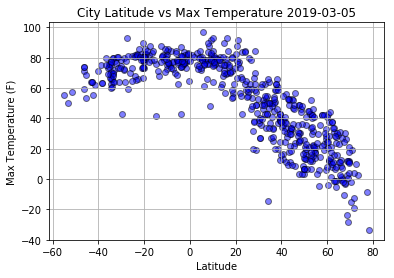

In [76]:
lat_temp_data = weather_df.groupby('city').sum()
y_axis_temp = lat_temp_data['max temperature']
x_axis_temp = lat_temp_data['latitude']
plt.scatter(x_axis_temp, y_axis_temp, color='blue', edgecolor='black', alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.title("City Latitude vs Max Temperature %s" % todays_date)
plt.savefig("citylattemp.png")
plt.show()

In [77]:
#An interesting discovery. If you leave off the method call, it gives you the entire bounds of the aggregation.
#That's how I found the city names for the six cities with temps over 90 degrees. I'd love a more elegant solution.
# cities_above_90 = lat_temp_data.loc[lat_temp_data['max temperature'] >= 90].count
# cities_above_90

<h4>Max Temperatures Relative to City Latitude</h4>
<p>Judging by the random sampling of coordinates taken from citipy, the city selection has a broad range of city locations. Of the 564 cities that came back with weather data, 398 cities were located at or above the equator, and 166 cities were located at or below the equator. As we move below the equator, we can see that the high temperature for the day remained above 60 degrees Fahrenheit up to the -40 degrees south Latitude point. That is a significantly longer range of high temperatures than those above the equator, where temperatures begin to drop below 60 degrees Fahrenheit at about the 20 degrees north Latitude point. This has a lot to do with the fact that we're approaching fall south of the equator. Temperatures can be expected to be more mild this time of year. In the north-western and north-eastern hemispheres above the equator, we are experiencing a long, frigid winter. At roughly the equator, temperatures remain above 60 degrees Fahrenheit, surprisingly cool. Between -40 degrees south Latitude and 20 degrees north Latitude, only 6 cities logged a high temperature for the day over 90 degrees Fahrenheit (Champerico, Kibala, Nicoya, Puerto Ayacucho, Punta Alta, and Teya). Given the persistent colloquialism that the closer to the equator one goes the hotter it gets, it seems that city data for early March is recording milder temperatures.</p>

<h3>Latitude vs Humidity Plot</h3>

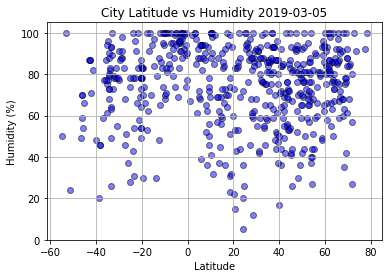

In [78]:
lat_humid_data = weather_df.groupby('city').mean()
x_axis_humid = lat_humid_data['latitude']
y_axis_humid = lat_humid_data['humidity']
plt.scatter(x_axis_humid, y_axis_humid, color='blue', edgecolor="black", alpha=0.5)
plt.ylim(0, 105)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity %s" % todays_date)
plt.grid()
plt.savefig("citylathumid.png")
plt.show()

<h3>Latitude vs Cloudiness Plot</h3>

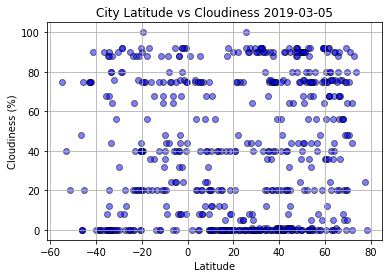

In [79]:
lat_clouds_data = weather_df.groupby('city').sum()
x_axis_clouds = lat_clouds_data['latitude']
y_axis_clouds = lat_clouds_data['cloudiness']
plt.scatter(x_axis_clouds, y_axis_clouds, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness %s" % todays_date)
plt.grid()
plt.savefig("citylatclouds.png")
plt.show()

<h4>Cloudiness vs Location Relative to the Equator</h4>
<p>It would appear that directly near and south of the equator (north of -20 degrees south Latitude) cloudiness tends to taper off that day. Though relative humidity plays a role in cloud formation, it would appear that it is not necessarily a cause of cloud formation, which is the presence of water condensation in the atmosphere. Normally, clouds form when warm, humid air from the ground rises to an elevation cool enough to form condensation. As we see in the humidity figure, a large cluster of cities near the equator seemed to experience high humidity (approaching 100%). On the same day, same set of cities on the cloudiness figure, there is a gap corresponding to the cluster on the humidity figure. Some other mitigating factor plays a role in cloud formation, and it is my belief that elevation and population density may be the missing links. Without at least the elevation levels of those cities to visualize beside the humidity and cloudiness figures, there is no other reasonable explanation for the lack of clouds in cities near the equator experiencing near 100% relative humidity.</p>

<h3>Latitude vs Wind Speed</h3>

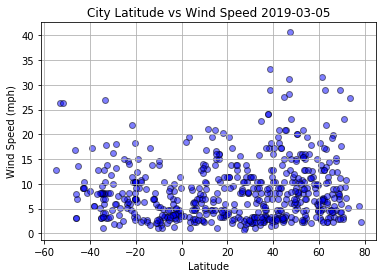

In [80]:
lat_wind_data = weather_df.groupby('city').sum()
x_axis_wind = lat_wind_data['latitude']
y_axis_wind = lat_wind_data['wind speed']
plt.scatter(x_axis_wind, y_axis_wind, color='blue', edgecolor="black", alpha=0.5)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed %s" % todays_date)
plt.grid()
plt.savefig("citylatwinds.png")
plt.show()

<h4>City Wind Speeds Relative to the Equator</h4>
<p>One cannot observe wind speed without also observing temperature. As temperatures rise, air pressure increases. As air pressure increases from one area to the next, wind speeds increase. Also notice how those five are further away from the equator, where pressure changes are more volatile. Again, I don't see this as unusual. In the mild and temperate temperatures recorded yesterday, and given their spread in the temperature plot, we can see that the 166 cities recorded between -40 degrees south Latitude and 20 degrees north Latitude have a fairly concentrated selection of cities of low or zero windspeeds near the equator. As one moves further north of the equator, wind speeds become more varied, reaching above 22mph at roughly 40 degrees north Latitude. In other words, the relative uniformity of moderate temperatures nearer to the equator means longer gradients of air pressure, therefore slower wind speeds.</p>